# Workbook for (hopefully) simulating holograms
(Created by George Lewis, based on code written by James Loudon and Sam Holt)

## Package import

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas                           # for reading data from file
from scipy import constants             # for scientific constants
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

# to fully print numpy arrays
import sys
np.set_printoptions(threshold=sys.maxsize)

## Magnetisation input
- First stage is to import or generate data. 
- Data should be an array where each row contains [$x, y, z, m_x, m_y, m_z$]. 
- This should then be organised so that 'coor' is an $n\times3$ array of [$x,y,z$] positions, with 'm_x', 'm_y' and 'm_z' each being an array of magnetisation data. 
- The extent of this data should cover the full region of interest (sample + space).

### Load from file

In [ ]:
folder = r'C:\Users\grl31\Documents\MERRILL\merrill-1.3.3-Windows-x86_64\size_loop_0mt'
fname = 'hyst_001_300.dat'
fpath = folder + '\\' + fname

# 'fixed width formatted' works directly with even .dat format
data = pandas.read_fwf(fpath, header = None)

all_x = np.take(data,0,axis=1)
all_y = np.take(data,1,axis=1)
all_z = np.take(data,2,axis=1)

coor = np.array([all_x,all_y,all_z]).T
m_x = np.take(data,3,axis=1)
m_y = np.take(data,4,axis=1)
m_z = np.take(data,5,axis=1)

### Generate 'bar magnet' dataset

In [101]:
# Generate x,y value
n = 100
xs = np.linspace(-50,50,n)
ys = np.linspace(-50,50,n)
zs = np.linspace(-50,50,n)
xx, yy, zz = np.meshgrid(xs,ys, zs)
nx = xx.reshape(n**3)
ny = yy.reshape(n**3)
nz = zz.reshape(n**3)
coor = np.array([nx,ny,nz]).T

# Generate magnetisation
Mx = np.zeros_like(xs)
My = np.zeros_like(ys)
Mz = np.zeros_like(zs)
Mxx, Myy, Mzz = np.meshgrid(Mx, My, Mz)
Mxx[round(n/4):round(3*n/4),round(n/4):round(3*n/4),round(n/4):round(3*n/4)] = 1
Myy[round(n/4):round(3*n/4),round(n/4):round(3*n/4),round(n/4):round(3*n/4)] = 1

m_x, m_y, m_z = Mxx, Myy, Mzz
MX, MY, MZ = Mxx, Myy, Mzz

ave_m_x = Mxx.mean(axis=2)
ave_m_y = Myy.mean(axis=2)
ave_m_z = Mzz.mean(axis=2)

### Generate 'ring' dataset

In [89]:
# Generate x,y value
n = 100
xs = np.linspace(-50,50,n)
ys = np.linspace(-50,50,n)
zs = np.linspace(-50,50,n)
xx, yy, zz = np.meshgrid(xs,ys, zs)
nx = xx.reshape(n**3)
ny = yy.reshape(n**3)
nz = zz.reshape(n**3)
coor = np.array([nx,ny,nz]).T

# Generate magnetisation
#Mx = np.zeros_like(xs)
#My = np.zeros_like(ys)
#Mz = np.zeros_like(zs)
#Mxx, Myy, Mzz = np.meshgrid(Mx, My, Mz)

data = []
for x in xs:
    for y in ys:
        for z in zs:
            if x**2 + y**2 < 25**2 and x**2 + y**2 > 10**2:
                m = [1,1,0]
                data.append([x,y,z,m[0],m[1],m[2]])
            else:
                m = [0,0,0]
                data.append([x,y,z,m[0],m[1],m[2]])

Mxx = np.take(data,3,axis=1)
Myy = np.take(data,4,axis=1)
Mzz = np.take(data,5,axis=1)

Mxx = Mxx.reshape(len(xs),len(ys),len(zs))
Myy = Myy.reshape(len(xs),len(ys),len(zs))
Mzz = Mzz.reshape(len(xs),len(ys),len(zs))

m_x, m_y, m_z = Mxx, Myy, Mzz
MX, MY, MZ = Mxx, Myy, Mzz

ave_m_x = Mxx.mean(axis=2)
ave_m_y = Myy.mean(axis=2)
ave_m_z = Mzz.mean(axis=2)

## Reshape/homogonise data

In [102]:
# Array with unique z coordinates
xuni = np.unique(coor[:,0])
yuni = np.unique(coor[:,1])
zuni = np.unique(coor[:,2])

# Length of each dimension
x_len = len(xuni)
y_len = len(yuni)
z_len = len(zuni)

# Generate mesh
X, Y, Z = np.meshgrid(xuni, yuni, zuni)

x_proj = np.average(X,axis=2)
y_proj = np.average(Y,axis=2)

# Calculate grid spacing
x_res = (xuni[1]-xuni[0])
y_res = (yuni[1]-yuni[0])
z_res = (yuni[1]-yuni[0])

# Limits of grid
x_begin = xuni[0] - 0.5*x_res
x_end = xuni[-1] + 0.5*x_res
y_begin = yuni[0] - 0.5*y_res
y_end = yuni[-1] + 0.5*y_res
z_begin = zuni[0] - 0.5*z_res
z_end = zuni[-1] + 0.5*z_res

# Calculate size of grid
x_size = (x_end-x_begin)
y_size = (y_end-y_begin)
z_size = (z_end-z_begin)

# Confirm the dimensions of the image and resolution for the user.
sym_details = 'The data imported has dimensions ' + str(x_size) + ' x ' + str(y_size) + ' x ' + str(z_size) + ' nm,\n'
sym_details += 'and resolution ' + str(x_res) + ' x ' + str(y_res) + ' x ' + str(z_res) + ' nm.\n'
sym_details += 'There are a total of ' + str(z_len) + ' slices in z.'
print(sym_details)

The data imported has dimensions 101.01010101 x 101.01010101 x 101.01010101 nm,
and resolution 1.0101010101 x 1.0101010101 x 1.0101010101 nm.
There are a total of 100 slices in z.


## Rotate data set
- Apply rotation matrix about x axis as described here 
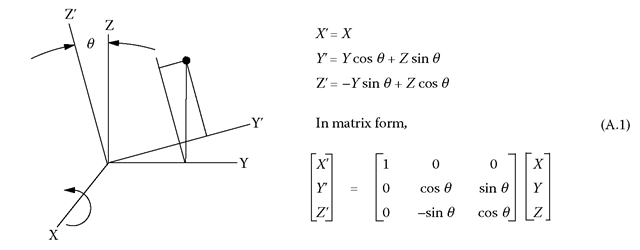

In [106]:
# Choose angle
# define in degrees, clockwise from +ve z if facing in +ve x direction
theta = 45 * 2*np.pi/360

rot_dat = []
n = 100

# Flatten data
Xflat = X.reshape(n**3)
Yflat = Y.reshape(n**3)
Zflat = Z.reshape(n**3)
MXflat = MX.reshape(n**3)
MYflat = MY.reshape(n**3)
MZflat = MZ.reshape(n**3)

# Apply transformation to flattened data
for i, xx in enumerate(Xflat):
    # extract data
    x0,y0,z0 = xx, Yflat[i], Zflat[i]
    mx, my, mz = MXflat[i], MYflat[i], MZflat[i]
    
    # apply transformation to coordinates
    xr = x0
    yr = np.cos(theta)*y0 - np.sin(theta)*z0
    zr = np.sin(theta)*y0 + np.cos(theta)*z0
    
    # apply transformation to magnetisation vectors
    mxr = mx
    myr = np.cos(theta)*my - np.sin(theta)*mz
    mzr = np.sin(theta)*my + np.cos(theta)*mz
    rot_dat.append([xr,yr,zr,mxr,myr,mzr])
    
# Extract rotated data
xrs = np.take(rot_dat,0,axis=1)
yrs = np.take(rot_dat,1,axis=1)
zrs = np.take(rot_dat,2,axis=1)
mxrs = np.take(rot_dat,3,axis=1)
myrs = np.take(rot_dat,4,axis=1)
mzrs = np.take(rot_dat,5,axis=1)

# Reshape rotated data
Xr,Yr,Zr = xrs.reshape(n,n,n),yrs.reshape(n,n,n),zrs.reshape(n,n,n)
MXr,MYr,MZr = mxrs.reshape(n,n,n),myrs.reshape(n,n,n),mzrs.reshape(n,n,n)

# Project rotated data
x_projr = np.average(Xr,axis=2)
y_projr = np.average(Yr,axis=2)
ave_m_x_r = np.average(MXr,axis=2)
ave_m_y_r = np.average(MYr,axis=2)

## Project rotated data along $original$ z axis

In [127]:
# Project rotated data
x_projr = np.average(Xr,axis=2)
y_projr = np.average(Yr,axis=2)
ave_m_x_r = np.average(MXr,axis=2)
ave_m_y_r = np.average(MYr,axis=2)

In [151]:
MYr[25,:,:]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

## Plot input data

In [128]:
# Unrotated dataset
# a = X
# b = Y
# c = Z
# d = ave_m_x
# e = ave_m_y
# f = MX
# g = MY
# h = MZ
# i = x_proj
# j = y_proj
# angle = 0

# Rotated dataset
a = Xr
b = Yr
c = Zr
d = ave_m_x_r.T # Transpose is necessary but not sure why...
e = ave_m_y_r.T
f = MXr
g = MYr
h = MZr
i = x_projr
j = y_projr
angle = theta*360*0.5/np.pi

### Plot M projected in z

In [129]:
# Skip step and arrow size
s = 10
size = 0.1

f, ax = plt.subplots(ncols=1, figsize=(8, 8))

# Generate colormap based on magnitude of B field
mag_B = (d**2 + e**2)**0.5#np.hypot(mx_avgr,my_avgr)
pos = ax.imshow(mag_B,origin='lower', extent=[x_begin, x_end, min(j[:,0]), max(j[:,0])],interpolation='spline16', cmap='Blues')
f.colorbar(pos, ax=ax,fraction=0.046, pad=0.04)

# Plot projected M vectors
plt.quiver(i[::s,::s],j[::s,::s],d[::s,::s],e[::s,::s],mag_B,scale=1/size,cmap='Spectral',pivot='mid')

plt.xlabel('X')
plt.ylabel('Y')
plt.ylim([x_begin,x_end])
plt.title('M projected through z (rotated %i degrees about x)' % angle)

Text(0.5, 1.0, 'M projected through z (rotated 45 degrees about x)')

### Plot M in 3D

In [109]:
# Plot M vectors in 3D
#plt.close(fig)
%matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')
s = 6
size = 4

ax.quiver(a[::s,::s,::s], b[::s,::s,::s], c[::s,::s,::s], f[::s,::s,::s], g[::s,::s,::s], h[::s,::s,::s],length = size)
plt.xlim([-50,50])
plt.ylim([-50,50])
ax.set_zlim3d([-50,50])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
plt.title('Rotated %i degrees about x' % angle)



Text(0.5, 0.92, 'Rotated 45 degrees about x')

In [87]:
a

KeyboardInterrupt: 

In [47]:
X = Xr
Y = Yr
Z = Zr
ave_m_x = ave_m_x_r.T
ave_m_y = ave_m_y_r.T
MX = MXr
MY = MYr
MZ = MZr
x_proj = x_projr
y_proj = y_projr

## Calculate magnetic phase and B-field
### Set parameters

In [48]:
ds = 0.1 # Defocus step in mm
kx = 0.1 # Tikhonov filter radius in x in pixels
ky = 0.1 # Tikhonov filter radius in y in pixels
kv = 300 # Acceleratig voltage of electrons in kV
Cs = 8000 # Spherical aberration coefficient in mm

In [49]:
# Function for working out the relativistic wavelength of an electron 
# Input in kV
# output in nm
def λ_func(V):
    V *= constants.kilo
    λ = constants.h/(constants.nano*np.sqrt(2*V*constants.m_e*constants.e))
    λ *= 1/(np.sqrt(1+(constants.e*V)/(2*constants.m_e*constants.c**2)))
    return λ

In [50]:
sx = 1/(x_size*x_res) # sampling in reciprocal space 
sy = 1/(y_size*y_res) # identical in both directions
const = 1j*z_size/(2*constants.codata.value('mag. flux quantum')/(constants.nano**2))
λ = λ_func(kv) # Wavelength of electrons in nm
print('The electron beam has a wavelength of %.2E nm.' % λ)

The electron beam has a wavelength of 1.97E-03 nm.


### Calculate phase

In [51]:
# Fourier transform magnetisation
ft_mx = np.fft.fft2(ave_m_x, axes=(-2, -1))
ft_my = np.fft.fft2(ave_m_y, axes=(-2, -1))

FreqCompRows = np.fft.fftfreq(ft_mx.shape[0],d=x_res)
FreqCompCols = np.fft.fftfreq(ft_mx.shape[1],d=y_res)
Xft, Yft = np.meshgrid(FreqCompCols,FreqCompRows) # Create a grid of coordinates


nume =  ((Xft**2)+(Yft**2))
dnom =  ((Xft**2)+(Yft**2)+(sx**2)*(kx**2)+(sy**2)*(ky**2))**2
cross = -ft_my*Xft+ft_mx*Yft
ft_phase = np.array(const*cross*nume/dnom)
phase = np.fft.ifft2(ft_phase).real

### Plot phase

In [57]:
plt.figure(figsize=(8, 8))
plt.title('Phase', fontsize=25)
imgplot1 = plt.imshow(phase,origin='lower', extent=[x_begin, x_end, min(j[:,0]), max(j[:,0])], cmap='gray', interpolation='spline16')
cbar1 = plt.colorbar(imgplot1, fraction=0.046, pad=0.04)
plt.xlabel("$x$ (nm)")
plt.ylabel("$y$ (nm)")
cbar_lab = cbar1.ax.set_ylabel("Phase in radians")

### Plot cosine of phase

In [58]:
pa = 35 # phase amplification factor

#print('The electron beam has a wavlength of %.2E nm.' % λ)

cos_phase = np.cos(pa*phase)
plt.figure(figsize=(8, 8), dpi=80)
plt.title(r'$\cos \left( %g \cdot \phi \right)$' % pa, fontsize=25)
#plt.title(r'$\cos \left( 10 \phi \right)$', fontsize=25)
imgplot3 = plt.imshow(cos_phase, origin='lower', extent=[x_begin, x_end, min(j[:,0]), max(j[:,0])],cmap='gray', interpolation='spline16')
cbar1 = plt.colorbar(imgplot3, fraction=0.046, pad=0.04)
plt.xlabel("$x$ (nm)")
plt.ylabel("$y$ (nm)")
cbar_lab = cbar1.ax.set_ylabel(r'$\cos \left( %g \cdot \phi  \right)$' % pa)

### Calculate projected B field

In [70]:
d_phase = np.gradient(phase)
b_const = (constants.codata.value('mag. flux quantum')/(constants.nano**2))/(np.pi*z_size)
b_field_x = -b_const*d_phase[0]/y_res
b_field_y = b_const*d_phase[1]/x_res

mag_B = np.hypot(b_field_x,b_field_y)
#mag_B = (1 - np.sqrt(b_field_x**2 + b_field_y**2)/np.max(np.sqrt(b_field_x**2 + b_field_y**2)))

### Plot projected B field

In [71]:
skip_arrow = 3
size_arrow = 0.14

f, ax = plt.subplots(ncols=1, figsize=(8, 8))

pos = ax.imshow(mag_B,origin='lower', extent=[x_begin, x_end, min(j[:,0]), max(j[:,0])],interpolation='spline16', cmap='Blues')
f.colorbar(pos, ax=ax,fraction=0.046, pad=0.04)

plt.quiver(x_proj[::skip_arrow, ::skip_arrow],
           y_proj[::skip_arrow, ::skip_arrow],
           b_field_x[::skip_arrow, ::skip_arrow], 
           b_field_y[::skip_arrow, ::skip_arrow], 
           np.arctan2(b_field_x[::skip_arrow, ::skip_arrow], 
                      b_field_y[::skip_arrow, ::skip_arrow]),
          scale = 1/size_arrow, cmap='nipy_spectral', pivot='mid')

ax.set_title('Projected B-field', fontsize=25)


Text(0.5, 1.0, 'Projected B-field')

In [56]:
max(y_proj[0])

50.0

## Generate tomography tilt planes
- Given tilt axis values (for either primary or secondary tilt axis), generates planes

Define the function that can calculate z values of a plane

In [109]:
def plane_calculator(xx, yy, tilt, axis_check=0):
    """ Calculate z values of plane defined by given tilt """
    # Convert primary/secondary holder tilts into theta/phi defining plane normal
    # Note theta is azimuth (in xy plane) and phi is polar/zenith angle 

    # check if you have primary or secondary tilted
    if axis_check != 0:
        theta = np.pi/2 # xy angle becomes perpendicular
    else:
        theta = 0

    # phi is deviation from z axis while tilt is devation from xy plane
    # But we want plane normal which is perpendicular:
    if tilt >= 0:
        phi = tilt * 2*np.pi/360
        theta += np.pi # phase change theta to account for 'negative' phi
    elif tilt < 0:
        phi = abs(tilt) * 2*np.pi/360

    # Calculate normal vector using angles
    nx = np.cos(theta) * np.sin(phi)
    ny = np.sin(theta) * np.sin(phi)
    nz = np.cos(phi)
    normal = [nx,ny,nz]

    # Define plane by normal and point (origin)
    point  = np.array([0, 0, 0])
    d = -point.dot(normal)
    z_plane = (d - normal[0] * xx - normal[1] * yy)  / normal[2]
    return z_plane

Plot planes in a tilt series

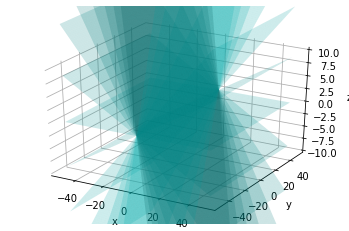

In [117]:
# Generate x,y value
n = 100
xs = np.linspace(-50,50,n)
ys = np.linspace(-50,50,n)
#zs = np.linspace(-50,50,n)
xx, yy = np.meshgrid(xs,ys)

tilts = np.arange(-70,70,10)
plt3d = plt.figure().gca(projection='3d')
axis_check = 1
for tilt in tilts:
    z_plane = plane_calculator(xx,yy,tilt)
    plt3d.plot_surface(xx, yy, z_plane, alpha=0.2, color='c')

ax = plt.gca()
ax.set_zlim([-10,10])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
#ax.grid(False)

## Slice data in a plane???
Currently all from here https://tomroelandts.com/articles/astra-toolbox-tutorial-reconstruction-from-projection-images-part-2
Link to the C++ code for the projection algorithm is here... https://github.com/astra-toolbox/astra-toolbox/blob/master/src/CudaForwardProjectionAlgorithm3D.cpp

In [159]:
import astra

In [160]:
# virtual scan parameters
distance_source_origin = 300  # [mm]
distance_origin_detector = 100  # [mm]
detector_pixel_size = 1.05  # [mm]
detector_rows = 200  # Vertical size of detector [pixels].
detector_cols = 200  # Horizontal size of detector [pixels].
num_of_projections = 3
angles = np.linspace(0, 2 * np.pi, num=num_of_projections, endpoint=False)

In [185]:
# Create phantom
vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                          detector_rows)
phantom = np.zeros((detector_rows, detector_cols, detector_cols))
hb = 110  # Height of beam [pixels].
wb = 40   # Width of beam [pixels].
hc = 100  # Height of cavity in beam [pixels].
wc = 30   # Width of cavity in beam [pixels].
phantom[detector_rows // 2 - hb // 2 : detector_rows // 2 + hb // 2,
        detector_cols // 2 - wb // 2 : detector_cols // 2 + wb // 2,
        detector_cols // 2 - wb // 2 : detector_cols // 2 + wb // 2] = 1
phantom[detector_rows // 2 - hc // 2 : detector_rows // 2 + hc // 2,
        detector_cols // 2 - wc // 2 : detector_cols // 2 + wc // 2,
        detector_cols // 2 - wc // 2 : detector_cols // 2 + wc // 2] = 0
phantom[detector_rows // 2 - 5 :       detector_rows // 2 + 5,
        detector_cols // 2 + wc // 2 : detector_cols // 2 + wb // 2,
       detector_cols // 2 - 5 :       detector_cols // 2 + 5] = 0
phantom_id = astra.data3d.create('-vol', vol_geom, data=phantom)

In [192]:
phantom[0,:,:].shape
Mxx[0,:,:].shape
plt.cla()

In [171]:
x = np.linspace(-10,10,21)
y = np.linspace(-10,10,21)
z = np.linspace(-10,10,21)
xs,ys,zs = np.meshgrid(x,y,z)
Mx = np.zeros_like(x)
My = np.zeros_like(y)
Mz = np.zeros_like(z)
Mxx, Myy, Mzz = np.meshgrid(Mx, My, Mz)
n=21
Mxx[5:15,5:15,5:15] = 1
vol_geom = astra.creators.create_vol_geom(21,21,21)
#phantom = np.array([Mxx,Myy,Mzz])
#phantom.shape
phantom_id = astra.data3d.create('-vol', vol_geom, data=Mxx)

In [193]:
# plot slice 
from matplotlib import pyplot as plt
plt.imshow(phantom[10,:,:]) # z, x, y planes
#phantom.shape === (200,200,200)

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

In [57]:
a = np.array(data)
phantom = a[:,-3:]

In [178]:
# create projections
proj_geom = astra.create_proj_geom('cone', 1, 1, detector_rows, detector_cols, angles,
                         (distance_source_origin + distance_origin_detector) / detector_pixel_size, 0)

projections_id, projections =  astra.creators.create_sino3d_gpu(phantom_id, proj_geom, vol_geom)

projections /= np.max(projections) # normalise


In [179]:
# Plot projections
plt.imshow(projections[:,1,:]) # middle value changes projection angle

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

In [128]:
# reconstruct from projections
proj_geom = \
  astra.create_proj_geom('cone', 1, 1, detector_rows, detector_cols, angles,
                         (distance_source_origin + distance_origin_detector) /
                         detector_pixel_size, 0)
projections_id = astra.data3d.create('-sino', proj_geom, projections)

vol_geom = astra.creators.create_vol_geom(detector_cols, detector_cols,
                                          detector_rows)
reconstruction_id = astra.data3d.create('-vol', vol_geom, data=0)
alg_cfg = astra.astra_dict('FDK_CUDA')
alg_cfg['ProjectionDataId'] = projections_id
alg_cfg['ReconstructionDataId'] = reconstruction_id
algorithm_id = astra.algorithm.create(alg_cfg)
astra.algorithm.run(algorithm_id)
reconstruction = astra.data3d.get(reconstruction_id)


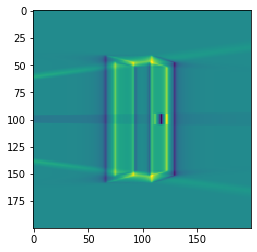

In [135]:
# plot reconstruction
plt.imshow(reconstruction[:,:,100])

## Rotations

In [136]:
from scipy.ndimage.interpolation import rotate as rotate

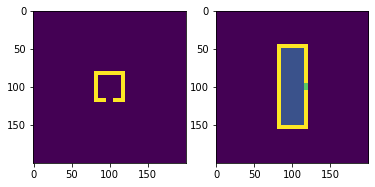

In [193]:
f, [ax1, ax2] = plt.subplots(nrows=1,ncols=2)
ax1.imshow(phantom[:,:,100]) # slice z
ax2.imshow(np.average(phantom,axis=2)) # projection

In [149]:
def rotate_3d(data,angle):
    """ Rotate 3D dataset about the x axis, give angle in degrees """
    # Define shape of output
    data_rot = np.zeros((data.shape[0], data.shape[1], data.shape[2]))
    
    # Rotate each slice individually about x axis
    for i in range(data.shape[0]):
        # Rotate
        s = data[i,:,:]
        srot = rotate(s,angle)
        
        # Crop back to original size
        midpoint = srot.shape[0]/2
        srot_crop = srot[round(midpoint-data.shape[1]/2):round(midpoint+data.shape[1]/2),
                         round(midpoint-data.shape[2]/2):round(midpoint+data.shape[2]/2)]
        
        # Store
        data_rot[i,:,:] = srot_crop
    
    return data_rot

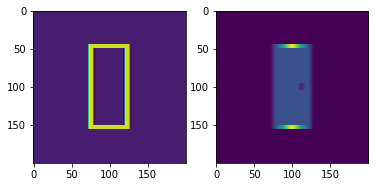

In [192]:
# Try out rotation on phantom
phant_rot = rotate_3d(phantom,45)

# plot rotated
f, [ax1, ax2] = plt.subplots(nrows=1,ncols=2)
ax1.imshow(phant_rot[:,:,100]) # slice x
ax2.imshow(np.average(phant_rot,axis=2)) # projection

In [96]:
# Next is to do this but for M vector at each point
# Generate x,y value
n = 100
xs = np.linspace(-50,50,n)
ys = np.linspace(-50,50,n)
zs = np.linspace(-50,50,n)
xx, yy, zz = np.meshgrid(xs,ys, zs)
nx = xx.reshape(n**3)
ny = yy.reshape(n**3)
nz = zz.reshape(n**3)
coor = np.array([nx,ny,nz]).T

# Generate magnetisation
#Mx = np.zeros_like(xs)
#My = np.zeros_like(ys)
#Mz = np.zeros_like(zs)
#Mxx, Myy, Mzz = np.meshgrid(Mx, My, Mz)

data = []
for x in xs:
    for y in ys:
        for z in zs:
            if x**2 + y**2 < 25**2 and x**2 + y**2 > 10**2 and z<25 and z>-25:
                m = [1,0,0]
                data.append([x,y,z,m[0],m[1],m[2]])
            else:
                m = [0,0,0]
                data.append([x,y,z,m[0],m[1],m[2]])

Mxx = np.take(data,3,axis=1)
Myy = np.take(data,4,axis=1)
Mzz = np.take(data,5,axis=1)

Mxx = Mxx.reshape(len(xs),len(ys),len(zs))
Myy = Myy.reshape(len(xs),len(ys),len(zs))
Mzz = Mzz.reshape(len(xs),len(ys),len(zs))

m_x, m_y, m_z = Mxx, Myy, Mzz
MX, MY, MZ = Mxx, Myy, Mzz

ave_m_x = Mxx.mean(axis=2)
ave_m_y = Myy.mean(axis=2)
ave_m_z = Mzz.mean(axis=2)

# Array with unique z coordinates
xuni = np.unique(coor[:,0])
yuni = np.unique(coor[:,1])
zuni = np.unique(coor[:,2])

# Length of each dimension
x_len = len(xuni)
y_len = len(yuni)
z_len = len(zuni)

# Generate mesh
X, Y, Z = np.meshgrid(xuni, yuni, zuni)

# Calculate grid spacing
x_res = (xuni[1]-xuni[0])
y_res = (yuni[1]-yuni[0])
z_res = (yuni[1]-yuni[0])

# Limits of grid
x_begin = xuni[0] - 0.5*x_res
x_end = xuni[-1] + 0.5*x_res
y_begin = yuni[0] - 0.5*y_res
y_end = yuni[-1] + 0.5*y_res
z_begin = zuni[0] - 0.5*z_res
z_end = zuni[-1] + 0.5*z_res

# Calculate size of grid
x_size = (x_end-x_begin)
y_size = (y_end-y_begin)
z_size = (z_end-z_begin)

In [57]:
#a = np.take(data,3,axis=1)
#b = a.reshape(100,100,100)
c = np.mean(b,axis=2)
max(c.reshape(100**2)) # mean of axis 0 and 1 = 0.44, mean of axis 2 = 0.25

0.25

In [91]:
# 3D unrotated
%matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')
s = 6
ax.quiver(X[::s,::s,::s], Y[::s,::s,::s], Z[::s,::s,::s], MX[::s,::s,::s], MY[::s,::s,::s], MZ[::s,::s,::s],  normalize=True)
plt.xlim([-50,50])
plt.ylim([-50,50])
ax.set_zlim3d([-50,50])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
plt.title('Unrotated')

Text(0.5, 0.92, 'Unrotated')

In [97]:
skip_arrow = 10#1
size_arrow = 0.08#0.04


f, ax = plt.subplots(figsize=(8, 8))
plt.title('Input magnetisation', fontsize=25)
Q = plt.quiver(X[::skip_arrow, ::skip_arrow, 0], 
               Y[::skip_arrow, ::skip_arrow, 0], 
               ave_m_x[::skip_arrow, ::skip_arrow], 
               ave_m_y[::skip_arrow, ::skip_arrow],
               np.arctan2(ave_m_x, ave_m_y),
               scale=1/size_arrow, cmap='Spectral', pivot='mid')

In [177]:
phantom.shape

(200, 200, 200)

In [190]:
phantom2 = np.array(X)

In [191]:
phantom2.shape

(100, 100, 100)

## Rotation which works
Model rotated

In [450]:
# Generate model
x = np.linspace(-10,10,21)
y = np.linspace(-10,10,21)
z = np.linspace(-10,10,21)
Mx = np.zeros_like(x)
My = np.ones_like(y)
Mz = np.zeros_like(z)

In [451]:
# Mesh model
X,Y,Z = np.meshgrid(x,y,z)
MX,MY,MZ = np.meshgrid(Mx,My,Mz)

In [452]:
# Project model
mx_avg = np.average(MX,axis=2)
my_avg = np.average(MY,axis=2)

Text(0.5, 1.0, 'M projected through z (original)')

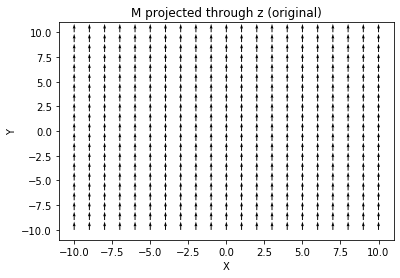

In [453]:
# Plot model
plt.quiver(X[:,:,0],Y[:,:,0],mx_avg,my_avg,scale=40)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('M projected through z (original)')

In [454]:
# Apply rotation
theta = 90 * 2*np.pi/360
rot_dat = []
for i, xx in enumerate(x):
    x0,y0,z0 = xx, y[i], z[i]
    mx, my, mz = Mx[i], My[i], Mz[i]
    
    xr = x0
    yr = np.cos(theta)*y0 - np.sin(theta)*z0
    zr = np.sin(theta)*y0 + np.cos(theta)*z0
    
    mxr = mx
    myr = np.cos(theta)*my - np.sin(theta)*mz
    mzr = np.sin(theta)*my + np.cos(theta)*mz
    rot_dat.append([xr,yr,zr,mxr,myr,mzr])

In [455]:
# Extract data
xrs = np.take(rot_dat,0,axis=1)
yrs = np.take(rot_dat,1,axis=1)
zrs = np.take(rot_dat,2,axis=1)
mxrs = np.take(rot_dat,3,axis=1)
myrs = np.take(rot_dat,4,axis=1)
mzrs = np.take(rot_dat,5,axis=1)

In [456]:
# Reform as grid
Xr,Yr,Zr = np.meshgrid(xrs,yrs,zrs)
MXr,MYr,MZr = np.meshgrid(mxrs,myrs,mzrs)

Text(0.5, 1.0, 'M projected through z (rotated 90 degrees about x)')

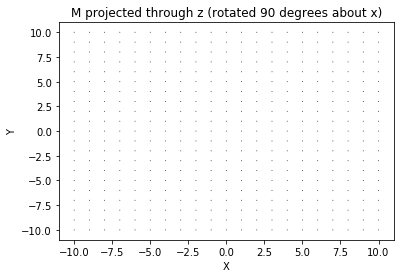

In [457]:
# Plot rotated
plt.quiver(Xr[:,:,0],Yr[:,:,0],MXr[:,:,0],MYr[:,:,0],scale=40)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('M projected through z (rotated %i degrees about x)' % (theta*360*0.5/np.pi))

Gridded data rotated

In [4]:
# Apply rotation
theta = 90 * 2*np.pi/360
rot_dat = []
n = 100
Xflat = X.reshape(n**3)
Yflat = Y.reshape(n**3)
Zflat = Z.reshape(n**3)
MXflat = MX.reshape(n**3)
MYflat = MY.reshape(n**3)
MZflat = MZ.reshape(n**3)
for i, xx in enumerate(Xflat):
    x0,y0,z0 = xx, Yflat[i], Zflat[i]
    mx, my, mz = MXflat[i], MYflat[i], MZflat[i]
    
    xr = x0
    yr = np.cos(theta)*y0 - np.sin(theta)*z0
    zr = np.sin(theta)*y0 + np.cos(theta)*z0
    
    mxr = mx
    myr = np.cos(theta)*my - np.sin(theta)*mz
    mzr = np.sin(theta)*my + np.cos(theta)*mz
    rot_dat.append([xr,yr,zr,mxr,myr,mzr])

In [5]:
# Extract data
xrs = np.take(rot_dat,0,axis=1)
yrs = np.take(rot_dat,1,axis=1)
zrs = np.take(rot_dat,2,axis=1)
mxrs = np.take(rot_dat,3,axis=1)
myrs = np.take(rot_dat,4,axis=1)
mzrs = np.take(rot_dat,5,axis=1)

In [6]:
Xr,Yr,Zr = xrs.reshape(n,n,n),yrs.reshape(n,n,n),zrs.reshape(n,n,n)
MXr,MYr,MZr = mxrs.reshape(n,n,n),myrs.reshape(n,n,n),mzrs.reshape(n,n,n)
# AFTER IT RESHAPES, THE COLUMN ORDER GOES TO Z Y X

In [71]:
# project
# Project model
import sys
np.set_printoptions(threshold=sys.maxsize)
mx_avgr = np.average(MXr,axis=0)
my_avgr = np.average(MYr,axis=0)

mag_B

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0. 

In [83]:
# Plot rotated projection
skip = 10


f, ax = plt.subplots(ncols=1, figsize=(8, 8))
mag_B = (mx_avgr**2 + my_avgr**2)**0.5#np.hypot(mx_avgr,my_avgr)
mag_B = mag_B.T
pos = ax.imshow(mag_B,origin='lower', extent=[x_begin, x_end, y_begin, y_end],interpolation='spline16', cmap='Blues')
f.colorbar(pos, ax=ax,fraction=0.046, pad=0.04)

plt.quiver(Xr[0,::skip,::skip],Yr[0,::skip,::skip],mx_avgr[::skip,::skip],my_avgr[::skip,::skip],scale=6)
#plt.quiver(Xr[::skip,::skip,0],Yr[::skip,::skip,0],mx_avgr,my_avgr,scale=40)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('M projected through z (rotated %i degrees about x)' % (theta*360*0.5/np.pi))

Text(0.5, 1.0, 'M projected through z (rotated 90 degrees about x)')

In [103]:
# Plot unrotated projection
skip = 10

f, ax = plt.subplots(ncols=1, figsize=(8, 8))
mag_B = np.hypot(ave_m_x,ave_m_y)
pos = ax.imshow(mag_B,origin='lower', extent=[x_begin, x_end, y_begin, y_end],interpolation='spline16', cmap='Blues')
f.colorbar(pos, ax=ax,fraction=0.046, pad=0.04)

plt.quiver(X[::skip,::skip,0],Y[::skip,::skip,0],ave_m_x[::skip,::skip],ave_m_y[::skip,::skip],scale=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('M projected through z unrotated')





Text(0.5, 1.0, 'M projected through z unrotated')

In [ ]:
# NOTE THAT IT MAY MAKE SENSE THAT SOMETIMES YOU SEE JUST A LINE, NEED TO MAKE SURE PLOTTING THE AVERAGE OTHERWISE IT IS TRUE

In [9]:
# unrotated 3d
%matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')
s = 6
ax.quiver(X[::s,::s,::s], Y[::s,::s,::s], Z[::s,::s,::s], MX[::s,::s,::s], MY[::s,::s,::s], MZ[::s,::s,::s],  normalize=True)
plt.xlim([-50,50])
plt.ylim([-50,50])
ax.set_zlim3d([-50,50])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
plt.title('Unrotated')

Text(0.5, 0.92, 'Unrotated')

In [164]:
# rotated 3d
%matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')
s = 6
ax.quiver(Xr[::s,::s,::s], Yr[::s,::s,::s], Zr[::s,::s,::s], MXr[::s,::s,::s], MYr[::s,::s,::s], MZr[::s,::s,::s],  normalize=True)
plt.xlim([-50,50])
plt.ylim([-50,50])
ax.set_zlim3d([-50,50])
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
deg = theta * 360/(2*np.pi)
plt.title('Rotated %i degrees about x' % deg)

Text(0.5, 0.92, 'Rotated 0 degrees about x')